SEVI CLUSTERING ANALYSIS - NEPAL DISTRICT VULNERABILITY

Loading SEVI Data
--------------------------------------------------------------------------------
✓ Loaded ML-ready data: 77 districts, 31 columns
✓ Loaded engineered data: 77 districts, 35 columns

Columns in ML-ready data (first 20):
  - ID
  - DISTRICT_NAME
  - PCT_WAL_MUD_BONDED_BRICKS_STONE
  - PCT_WAL_CEMENT_BONDED_BRICKS_STONE
  - PCT_WAL_WOOD_PLANKS
  - PCT_WAL_BAMBOO
  - PCT_WAL_UNBAKED_BRICKS
  - PCT_WAL_GALVANIZED_SHEET
  - PCT_WAL_PREFABRICATED_SHEET
  - PCT_WAL_OTHER
  - PCT_DRI_TAP_PIPED_WITHIN_PREMISES
  - PCT_DRI_TAP_PIPED_OUTSIDE_PREMISES
  - PCT_DRI_TUBEWELL_HANDPUMP
  - PCT_DRI_COVERED_WELL_KUWA
  - PCT_DRI_UNCOVERED_WELL_KUWA
  - PCT_DRI_SPOUT_WATER
  - PCT_DRI_RIVER_STREAM
  - PCT_DRI_JAR_BOTTLE
  - PCT_DRI_OTHER_SOURCES
  - PCT_TOI_FLUSH_PUBLIC_SEWERAGE

Columns in engineered data (first 20):
  - ID
  - DISTRICT_NAME
  - PCT_WAL_MUD_BONDED_BRICKS_STONE
  - PCT_WAL_CEMENT_BONDED_BRICKS_STONE
  - PCT_WAL_WOOD

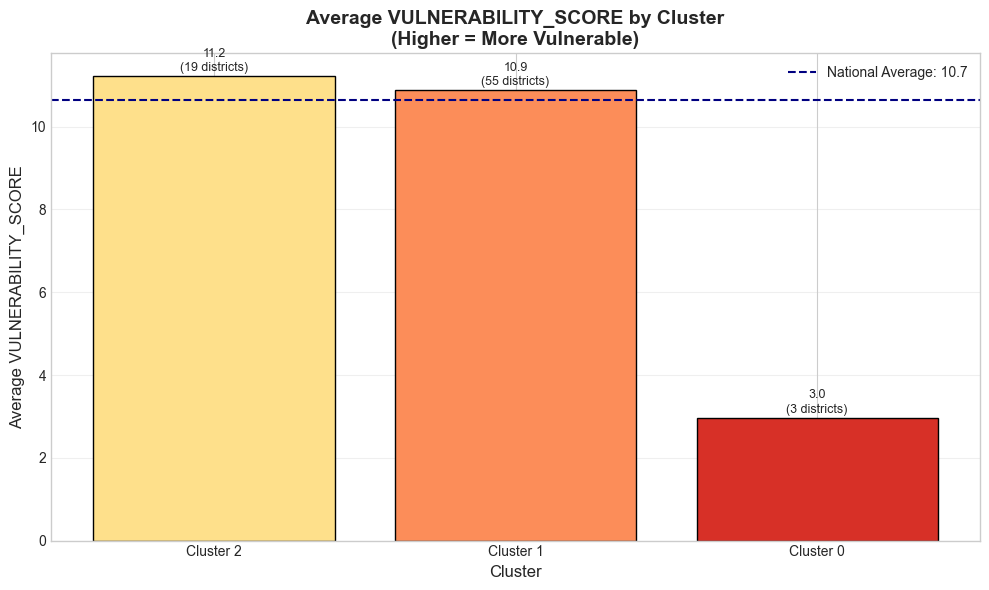

✓ Saved: 1_cluster_vulnerability_levels.png

--------------------------------------------------------------------------------
CHART 2: GEOGRAPHICAL DISTRIBUTION BY PROVINCE
--------------------------------------------------------------------------------


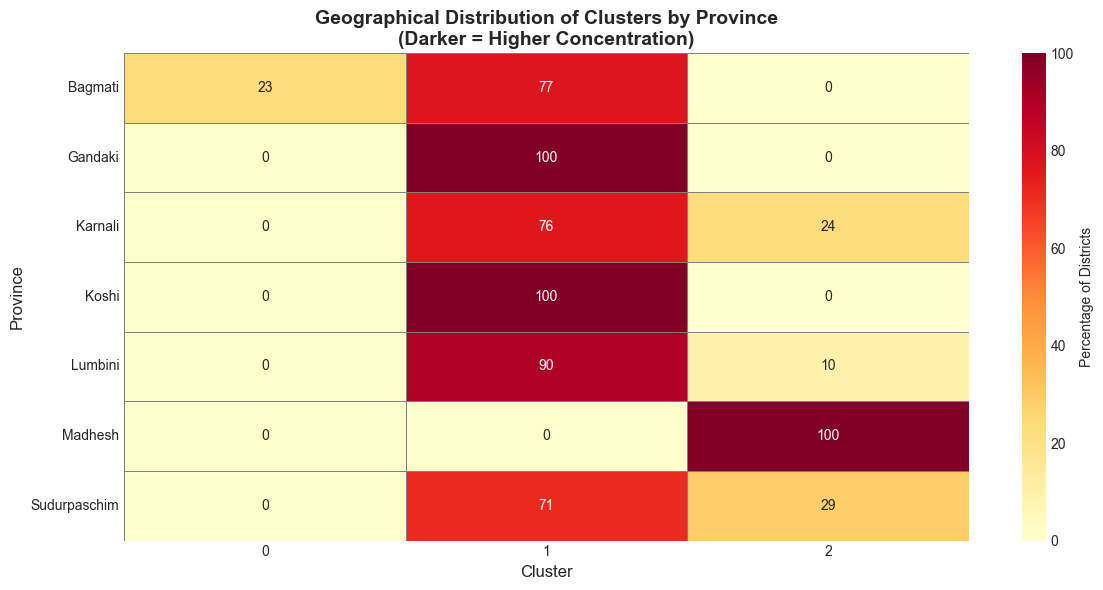

✓ Saved: 2_geographical_distribution.png

--------------------------------------------------------------------------------
CHART 3: CLUSTER SIZES
--------------------------------------------------------------------------------


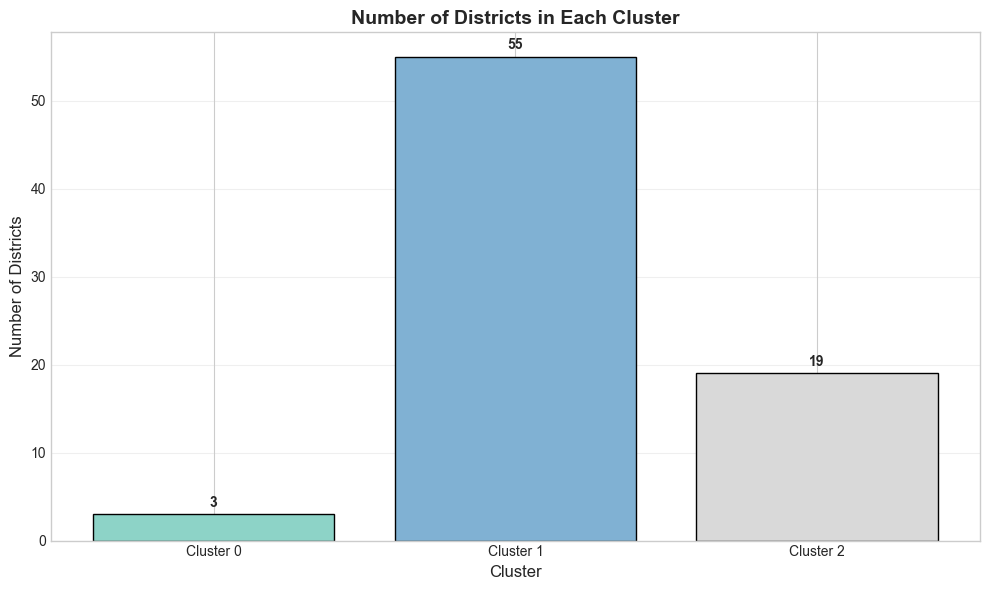

✓ Saved: 3_cluster_sizes.png

--------------------------------------------------------------------------------
CHART 4: TOP VULNERABLE DISTRICTS
--------------------------------------------------------------------------------


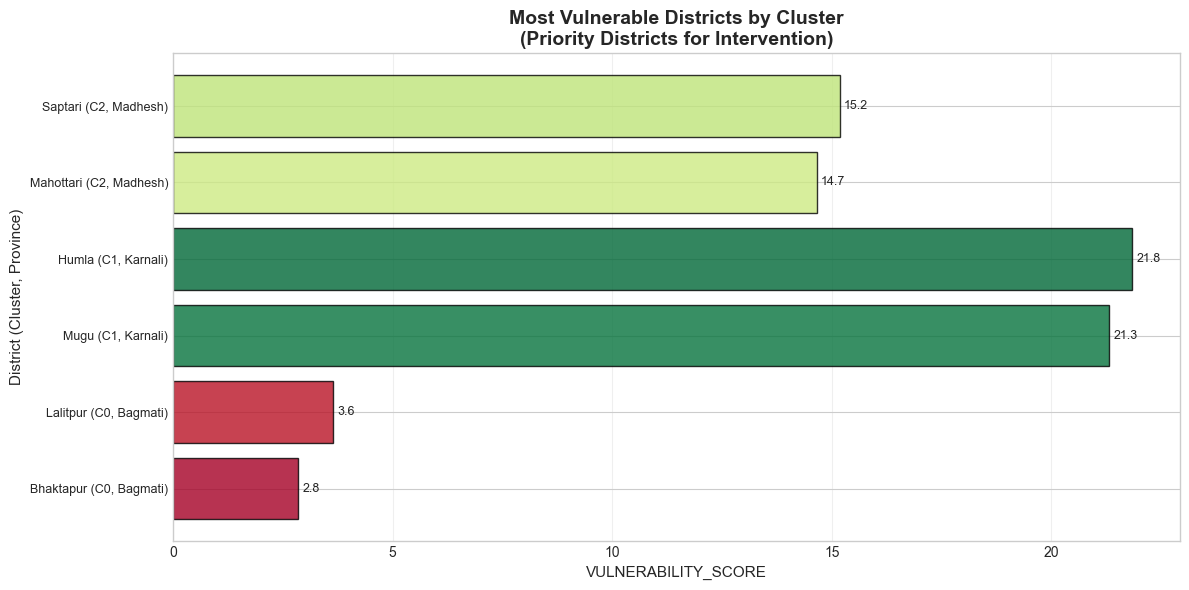

✓ Saved: 4_top_vulnerable_districts.png

SAVING DETAILED RESULTS
✓ Saved clustering results: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\data\final\nepal_districts_clustering_results.csv
✓ Saved Cluster 2 districts: 19 districts
✓ Saved Cluster 1 districts: 55 districts
✓ Saved Cluster 0 districts: 3 districts
✓ Saved cluster statistics: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\clustering\cluster_statistics.csv
✓ Saved cluster feature means: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\clustering\cluster_feature_means.csv
✓ Saved analysis summary: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\clustering\analysis_summary.txt

ANALYSIS COMPLETE - FINAL SUMMARY

DISTRICT DISTRIBUTION ACROSS 3 CLUSTERS:

Cluster 2:
  • Districts: 19
  • Average Score: 11.22
  • Provinces: Madhesh, Lumbini, Karnali, Sudurpaschim

Cluster 1:
  • Districts: 55
  • Average Score: 10.88
  • Provinces: Koshi, Bagmati, Gandaki, Lumbini, Karnali, Sudurpaschim

Cluster 0:
  • Districts: 

In [2]:
"""
Nepal District Vulnerability Analysis - Clustering Analysis for Vulnerability Patterns
FIXED VERSION: Handle data type issues
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Setup
FINAL_PATH = Path(r'C:\Users\saurav\Downloads\SEVI_NEPAL_Project\data\final')
RESULTS_PATH = Path(r'C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\clustering')
RESULTS_PATH.mkdir(parents=True, exist_ok=True)

print("="*80)
print("SEVI CLUSTERING ANALYSIS - NEPAL DISTRICT VULNERABILITY")
print("="*80)

# ============================================================================
# STEP 1: Load Data
# ============================================================================
print("\nLoading SEVI Data")
print("-"*80)

# Load both datasets
ml_df = pd.read_csv(FINAL_PATH / 'nepal_districts_ml_ready.csv')
print(f"✓ Loaded ML-ready data: {len(ml_df)} districts, {ml_df.shape[1]} columns")

# Also load the engineered dataset for vulnerability indices
engineered_df = pd.read_csv(FINAL_PATH / 'nepal_districts_engineered.csv')
print(f"✓ Loaded engineered data: {len(engineered_df)} districts, {engineered_df.shape[1]} columns")

# Check what columns we have
print("\nColumns in ML-ready data (first 20):")
for col in ml_df.columns[:20]:
    print(f"  - {col}")

print("\nColumns in engineered data (first 20):")
for col in engineered_df.columns[:20]:
    print(f"  - {col}")

# Merge the datasets to get all information
if 'ID' in ml_df.columns and 'ID' in engineered_df.columns:
    combined_df = pd.merge(
        ml_df,
        engineered_df[['ID', 'HOUSING_VULN', 'WATER_VULN', 'SANITATION_VULN', 
                      'VULNERABILITY_SCORE', 'VULNERABILITY_CATEGORY']],
        on='ID',
        how='left'
    )
    print(f"\n✓ Merged datasets on ID: {len(combined_df)} districts")
elif 'DISTRICT_NAME' in ml_df.columns and 'DISTRICT_NAME' in engineered_df.columns:
    combined_df = pd.merge(
        ml_df,
        engineered_df[['DISTRICT_NAME', 'HOUSING_VULN', 'WATER_VULN', 'SANITATION_VULN',
                      'VULNERABILITY_SCORE', 'VULNERABILITY_CATEGORY']],
        on='DISTRICT_NAME',
        how='left'
    )
    print(f"\n✓ Merged datasets by district name: {len(combined_df)} districts")
else:
    combined_df = ml_df.copy()
    print(f"\n⚠ Could not merge datasets, using ML-ready data only")

print(f"\nDataset shape: {combined_df.shape}")
print(f"\nSample data:")
print(combined_df.head())

# Add province information
def assign_province(district_id):
    if pd.isna(district_id):
        return 'Unknown'
    
    try:
        district_id = int(district_id)
        province_mapping = {
            range(14, 24): 'Koshi',
            range(24, 36): 'Madhesh',
            range(36, 49): 'Bagmati',
            range(49, 57): 'Gandaki',
            range(57, 67): 'Lumbini',
            range(67, 84): 'Karnali',
            range(84, 91): 'Sudurpaschim'
        }
        for id_range, province in province_mapping.items():
            if district_id in id_range:
                return province
        return 'Unknown'
    except:
        return 'Unknown'

if 'ID' in combined_df.columns:
    combined_df['PROVINCE'] = combined_df['ID'].apply(assign_province)
    print("✓ Assigned provinces based on ID")
else:
    print("⚠ ID column not found for province assignment")
    combined_df['PROVINCE'] = 'Unknown'

# Check target variable
print(f"\nTarget variable distribution:")
if 'VULNERABILITY_CATEGORY' in combined_df.columns:
    print(combined_df['VULNERABILITY_CATEGORY'].value_counts())
elif 'TARGET_CATEGORY' in combined_df.columns:
    print(combined_df['TARGET_CATEGORY'].value_counts())
    combined_df['VULNERABILITY_CATEGORY'] = combined_df['TARGET_CATEGORY']
else:
    print("⚠ No vulnerability category found")

# ============================================================================
# STEP 2: Prepare Data for Clustering
# ============================================================================
print("\nPreparing Data for Clustering")
print("-"*80)

# Get all PCT_ percentage features
pct_features = [col for col in combined_df.columns if col.startswith('PCT_')]
print(f"Found {len(pct_features)} PCT features")

# Get all WAL_, DRI_, TOI_ features (raw counts if they exist)
wall_features = [col for col in combined_df.columns if col.startswith('WAL_') and not col.startswith('PCT_')]
water_features = [col for col in combined_df.columns if col.startswith('DRI_') and not col.startswith('PCT_')]
toilet_features = [col for col in combined_df.columns if col.startswith('TOI_') and not col.startswith('PCT_')]

raw_features = wall_features + water_features + toilet_features
print(f"Found {len(raw_features)} raw count features")

# Get engineered ratio features
engineered_features = []
for col in combined_df.columns:
    if ('RATIO' in col or 'DIVERSITY' in col or 'QUALITY' in col) and not col.startswith('PCT_'):
        engineered_features.append(col)

print(f"Found {len(engineered_features)} engineered features")

# Combine all features for clustering
feature_cols = pct_features + engineered_features

# If no features found, use all numerical columns except IDs
if len(feature_cols) == 0:
    print("⚠ No standard features found, using all numerical columns...")
    numerical_cols = combined_df.select_dtypes(include=[np.number]).columns.tolist()
    # Remove ID and score columns
    feature_cols = [col for col in numerical_cols 
                   if col not in ['ID', 'TARGET_SCORE', 'VULNERABILITY_SCORE'] 
                   and not col.endswith('_VULN')]

print(f"\nUsing {len(feature_cols)} total features for clustering")
print("\nFirst 10 features:")
for col in feature_cols[:10]:
    print(f"  - {col}")

# Check for missing values
missing_values = combined_df[feature_cols].isnull().sum()
if missing_values.sum() > 0:
    print(f"\nMissing values found in features:")
    for col, missing_count in missing_values[missing_values > 0].items():
        print(f"  - {col}: {missing_count} missing values")
    # Fill missing values with column means
    for col in feature_cols:
        if combined_df[col].isnull().sum() > 0:
            combined_df[col] = combined_df[col].fillna(combined_df[col].mean())
            print(f"  ✓ Filled missing values in {col} with mean")
else:
    print("✓ No missing values found in features")

# Check data types
print(f"\nData types of features:")
for col in feature_cols[:10]:  # Show first 10
    print(f"  - {col}: {combined_df[col].dtype}")

# Extract features for clustering
X = combined_df[feature_cols].values

print(f"\nFeature matrix shape: {X.shape}")

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Data scaled successfully. Shape: {X_scaled.shape}")

# ============================================================================
# STEP 3: Determine Optimal Number of Clusters
# ============================================================================
print("\nFinding Optimal Number of Clusters")
print("-"*80)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k_range = range(2, 11)
results = []

print("Testing cluster numbers from 2 to 10...")
for k in k_range:
    print(f"  Testing k={k}...", end="")
    try:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
        kmeans_labels = kmeans.fit_predict(X_scaled)
        sil_score = silhouette_score(X_scaled, kmeans_labels)
        ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)
        db_score = davies_bouldin_score(X_scaled, kmeans_labels)
        
        results.append({
            'k': int(k),  # Ensure k is integer
            'silhouette': float(sil_score),
            'calinski_harabasz': float(ch_score),
            'davies_bouldin': float(db_score),
            'inertia': float(kmeans.inertia_)
        })
        print(f" ✓")
    except Exception as e:
        print(f" ✗ Error: {str(e)}")
        continue

opt_df = pd.DataFrame(results)

if len(opt_df) == 0:
    print("\n⚠ No valid clustering results. Check your data.")
    exit()

# Display results
print(f"\nClustering Evaluation Results:")
print("-"*60)
print(f"{'k':>4}  {'Silhouette':>12}  {'Calinski':>12}  {'Davies':>12}")
print("-"*60)
for _, row in opt_df.iterrows():
    k_val = int(row['k'])  # Convert to int for formatting
    print(f"{k_val:4d}  {row['silhouette']:11.4f}  {row['calinski_harabasz']:11.2f}  {row['davies_bouldin']:11.4f}")

# Determine optimal k
try:
    optimal_k_sil = int(opt_df.loc[opt_df['silhouette'].idxmax(), 'k'])
    optimal_k_ch = int(opt_df.loc[opt_df['calinski_harabasz'].idxmax(), 'k'])
    optimal_k_db = int(opt_df.loc[opt_df['davies_bouldin'].idxmin(), 'k'])
    
    print(f"\nOptimal clusters by different metrics:")
    print(f"• Silhouette Score: {optimal_k_sil} clusters (score: {opt_df['silhouette'].max():.3f})")
    print(f"• Calinski-Harabasz Score: {optimal_k_ch} clusters (score: {opt_df['calinski_harabasz'].max():.0f})")
    print(f"• Davies-Bouldin Score: {optimal_k_db} clusters (score: {opt_df['davies_bouldin'].min():.3f})")
    
    # Choose the most common optimal k
    k_values = [optimal_k_sil, optimal_k_ch, optimal_k_db]
    optimal_k = max(set(k_values), key=k_values.count)
    
    # Ensure optimal_k is within reasonable bounds
    optimal_k = max(2, min(8, optimal_k))  # Between 2 and 8 clusters
    print(f"\nSelected optimal clusters: {optimal_k}")
    
except Exception as e:
    print(f"\n⚠ Error determining optimal k: {str(e)}")
    optimal_k = 4  # Default to 4 clusters
    print(f"Using default: {optimal_k} clusters")

# ============================================================================
# STEP 4: Apply Clustering
# ============================================================================
print("\nApplying K-Means Clustering")
print("-"*80)

try:
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=25)
    combined_df['CLUSTER'] = kmeans.fit_predict(X_scaled)
    print(f"✓ Created {optimal_k} vulnerability clusters")
    
    # Identify score column for ranking clusters
    if 'VULNERABILITY_SCORE' in combined_df.columns:
        score_col = 'VULNERABILITY_SCORE'
    elif 'TARGET_SCORE' in combined_df.columns:
        score_col = 'TARGET_SCORE'
    else:
        # Create a simple score from vulnerable features
        vulnerable_cols = [col for col in pct_features if any(term in col for term in 
                          ['MUD', 'BAMBOO', 'UNBAKED', 'UNCOVERED', 'RIVER', 'WITHOUT'])]
        if len(vulnerable_cols) > 0:
            combined_df['VULNERABILITY_SCORE'] = combined_df[vulnerable_cols].mean(axis=1)
            score_col = 'VULNERABILITY_SCORE'
            print(f"✓ Created vulnerability score from {len(vulnerable_cols)} features")
        else:
            # Use first PCT feature as proxy
            if len(pct_features) > 0:
                combined_df['VULNERABILITY_SCORE'] = combined_df[pct_features[0]]
                score_col = 'VULNERABILITY_SCORE'
                print(f"⚠ Using {pct_features[0]} as proxy score")
            else:
                print("⚠ No score column available for ranking clusters")
                score_col = None
    
    if score_col:
        # Calculate cluster statistics
        cluster_means = combined_df.groupby('CLUSTER')[score_col].mean().sort_values(ascending=False)
        clusters_sorted = cluster_means.index
        
        print(f"\nCluster average scores (higher = more vulnerable):")
        for cluster_id in clusters_sorted:
            avg_score = cluster_means[cluster_id]
            cluster_size = len(combined_df[combined_df['CLUSTER'] == cluster_id])
            print(f"  Cluster {cluster_id}: {avg_score:.2f} ({cluster_size} districts)")
    
except Exception as e:
    print(f"⚠ Error applying clustering: {str(e)}")
    # Create dummy clusters
    combined_df['CLUSTER'] = 0
    clusters_sorted = [0]
    score_col = None

# ============================================================================
# STEP 4.5: SHOW ACTUAL DISTRICT DATA FOR EACH CLUSTER
# ============================================================================
print("\n" + "="*80)
print("DISTRICT DISTRIBUTION BY CLUSTER")
print("="*80)

print("\nCLUSTER COMPOSITION:")
print("-"*80)

for cluster_id in clusters_sorted:
    cluster_data = combined_df[combined_df['CLUSTER'] == cluster_id]
    cluster_size = len(cluster_data)
    
    print(f"\n📍 CLUSTER {cluster_id}:")
    print(f"   • Districts: {cluster_size}")
    
    if score_col:
        avg_score = cluster_data[score_col].mean()
        print(f"   • Average {score_col}: {avg_score:.2f}")
    
    if 'PROVINCE' in cluster_data.columns:
        provinces = cluster_data['PROVINCE'].unique()
        print(f"   • Provinces: {', '.join(provinces)}")
    
    # Show top districts in this cluster
    if score_col:
        print(f"   • Most Vulnerable Districts (Top 5):")
        top_districts = cluster_data.nlargest(5, score_col)
        for idx, row in top_districts.iterrows():
            district_name = row.get('DISTRICT_NAME', f"District_{row.get('ID', 'Unknown')}")
            province = row.get('PROVINCE', 'Unknown')
            category = row.get('VULNERABILITY_CATEGORY', row.get('TARGET_CATEGORY', 'Unknown'))
            print(f"      - {district_name} ({province}): {row[score_col]:.2f} ({category})")

# ============================================================================
# STEP 5: Create Visualizations
# ============================================================================

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

plt.style.use('seaborn-v0_8-whitegrid')

# ============================================================================
# VISUALIZATION 1: Cluster Vulnerability Levels
# ============================================================================
print("\n" + "-"*80)
print("CHART 1: CLUSTER VULNERABILITY LEVELS")
print("-"*80)

if score_col:
    plt.figure(figsize=(10, 6))
    means_sorted = cluster_means.values

    # Color based on vulnerability level
    colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']
    colors = colors[:len(clusters_sorted)]
    colors.reverse()

    bars = plt.bar(range(len(clusters_sorted)), means_sorted, 
                   color=colors, edgecolor='black', linewidth=1)

    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(f'Average {score_col}', fontsize=12)
    plt.title(f'Average {score_col} by Cluster\n(Higher = More Vulnerable)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(clusters_sorted)), [f'Cluster {i}' for i in clusters_sorted])

    # Add national average
    national_avg = combined_df[score_col].mean()
    plt.axhline(y=national_avg, color='navy', linestyle='--', linewidth=1.5, 
               label=f'National Average: {national_avg:.1f}')

    # Add value labels
    for bar, mean_val, cluster_id in zip(bars, means_sorted, clusters_sorted):
        cluster_size = len(combined_df[combined_df['CLUSTER'] == cluster_id])
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                 f'{mean_val:.1f}\n({cluster_size} districts)', 
                 ha='center', va='bottom', fontsize=9)

    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / '1_cluster_vulnerability_levels.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: 1_cluster_vulnerability_levels.png")
else:
    print("⚠ Skipping vulnerability levels chart: No score column available")

# ============================================================================
# VISUALIZATION 2: Geographical Distribution
# ============================================================================
print("\n" + "-"*80)
print("CHART 2: GEOGRAPHICAL DISTRIBUTION BY PROVINCE")
print("-"*80)

if 'PROVINCE' in combined_df.columns and len(combined_df['PROVINCE'].unique()) > 1:
    plt.figure(figsize=(12, 6))
    
    # Calculate percentage of each province in each cluster
    province_cluster_pct = pd.crosstab(combined_df['PROVINCE'], combined_df['CLUSTER'], normalize='index') * 100
    
    # Sort provinces by cluster distribution
    province_cluster_pct = province_cluster_pct.sort_index()
    
    # Create heatmap
    sns.heatmap(province_cluster_pct, annot=True, fmt='.0f', cmap='YlOrRd',
                linewidths=0.5, linecolor='gray', 
                cbar_kws={'label': 'Percentage of Districts'})
    
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Province', fontsize=12)
    plt.title('Geographical Distribution of Clusters by Province\n(Darker = Higher Concentration)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / '2_geographical_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: 2_geographical_distribution.png")
else:
    print("⚠ Skipping geographical distribution chart: No province data or only one province")

# ============================================================================
# VISUALIZATION 3: Cluster Sizes
# ============================================================================
print("\n" + "-"*80)
print("CHART 3: CLUSTER SIZES")
print("-"*80)

plt.figure(figsize=(10, 6))

cluster_sizes = combined_df['CLUSTER'].value_counts().sort_index()
colors = plt.cm.Set3(np.arange(len(cluster_sizes)) / len(cluster_sizes))

bars = plt.bar(range(len(cluster_sizes)), cluster_sizes.values, 
               color=colors, edgecolor='black', linewidth=1)

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Districts', fontsize=12)
plt.title('Number of Districts in Each Cluster', fontsize=14, fontweight='bold')
plt.xticks(range(len(cluster_sizes)), [f'Cluster {i}' for i in cluster_sizes.index])

# Add value labels
for bar, size in zip(bars, cluster_sizes.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{size}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(RESULTS_PATH / '3_cluster_sizes.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 3_cluster_sizes.png")

# ============================================================================
# VISUALIZATION 4: Top Vulnerable Districts
# ============================================================================
print("\n" + "-"*80)
print("CHART 4: TOP VULNERABLE DISTRICTS")
print("-"*80)

if score_col:
    # Get top 2 most vulnerable districts from each cluster
    top_districts_all = []
    for cluster_id in clusters_sorted:
        cluster_data = combined_df[combined_df['CLUSTER'] == cluster_id]
        top_districts = cluster_data.nlargest(2, score_col)
        top_districts_all.append(top_districts)

    top_districts_df = pd.concat(top_districts_all)

    plt.figure(figsize=(12, 6))

    # Create horizontal bar chart
    y_pos = np.arange(len(top_districts_df))
    colors_districts = plt.cm.RdYlGn_r(1 - (top_districts_df[score_col].values - 
                                           top_districts_df[score_col].min()) / 
                                       (top_districts_df[score_col].max() - 
                                        top_districts_df[score_col].min()))

    bars = plt.barh(y_pos, top_districts_df[score_col], 
                    color=colors_districts, edgecolor='black', alpha=0.8)

    plt.yticks(y_pos)
    labels = []
    for _, row in top_districts_df.iterrows():
        district_name = row.get('DISTRICT_NAME', f"District_{row.get('ID', 'Unknown')}")
        province = row.get('PROVINCE', 'Unknown')
        labels.append(f"{district_name} (C{row['CLUSTER']}, {province})")

    plt.gca().set_yticklabels(labels, fontsize=9)
    plt.gca().invert_yaxis()
    plt.xlabel(score_col, fontsize=11)
    plt.ylabel('District (Cluster, Province)', fontsize=11)
    plt.title('Most Vulnerable Districts by Cluster\n(Priority Districts for Intervention)', fontsize=14, fontweight='bold')

    # Add value labels
    for bar, score in zip(bars, top_districts_df[score_col]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                f'{score:.1f}', va='center', fontsize=9)

    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / '4_top_vulnerable_districts.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: 4_top_vulnerable_districts.png")
else:
    print("⚠ Skipping top vulnerable districts chart: No score column available")

# ============================================================================
# STEP 6: Save Detailed Results
# ============================================================================
print("\n" + "="*80)
print("SAVING DETAILED RESULTS")
print("="*80)

# Prepare output columns
output_columns = ['ID', 'DISTRICT_NAME', 'PROVINCE', 'CLUSTER']
if 'VULNERABILITY_SCORE' in combined_df.columns:
    output_columns.append('VULNERABILITY_SCORE')
if 'VULNERABILITY_CATEGORY' in combined_df.columns:
    output_columns.append('VULNERABILITY_CATEGORY')
if 'TARGET_SCORE' in combined_df.columns:
    output_columns.append('TARGET_SCORE')
if 'TARGET_CATEGORY' in combined_df.columns:
    output_columns.append('TARGET_CATEGORY')

# Filter to existing columns
existing_cols = [col for col in output_columns if col in combined_df.columns]
clustering_results = combined_df[existing_cols].sort_values(['CLUSTER'], ascending=[True])

# Add ranking if we have a score column
if score_col and score_col in clustering_results.columns:
    clustering_results = clustering_results.sort_values(['CLUSTER', score_col], ascending=[True, False])

clustering_results_path = FINAL_PATH / 'nepal_districts_clustering_results.csv'
clustering_results.to_csv(clustering_results_path, index=False)
print(f"✓ Saved clustering results: {clustering_results_path}")

# Save cluster-wise district lists
for cluster_id in clusters_sorted:
    cluster_districts = clustering_results[clustering_results['CLUSTER'] == cluster_id]
    cluster_file = RESULTS_PATH / f'cluster_{cluster_id}_districts.csv'
    cluster_districts.to_csv(cluster_file, index=False)
    print(f"✓ Saved Cluster {cluster_id} districts: {len(cluster_districts)} districts")

# Save cluster statistics
cluster_stats = combined_df.groupby('CLUSTER').agg({
    'DISTRICT_NAME': 'count'
}).round(2)

if 'PROVINCE' in combined_df.columns:
    cluster_stats['Provinces_Count'] = combined_df.groupby('CLUSTER')['PROVINCE'].nunique()
    cluster_stats['Top_Provinces'] = combined_df.groupby('CLUSTER')['PROVINCE'].agg(
        lambda x: ', '.join(x.value_counts().head(3).index.tolist())
    )

if score_col:
    stats = combined_df.groupby('CLUSTER')[score_col].agg(['mean', 'std', 'min', 'max', 'median']).round(2)
    cluster_stats = pd.concat([cluster_stats, stats], axis=1)

cluster_stats.columns = ['District_Count'] + list(cluster_stats.columns[1:])

cluster_stats_path = RESULTS_PATH / 'cluster_statistics.csv'
cluster_stats.to_csv(cluster_stats_path)
print(f"✓ Saved cluster statistics: {cluster_stats_path}")

# Save cluster feature means
if len(feature_cols) > 0:
    cluster_feature_means = combined_df.groupby('CLUSTER')[feature_cols].mean().round(3)
    cluster_feature_means_path = RESULTS_PATH / 'cluster_feature_means.csv'
    cluster_feature_means.to_csv(cluster_feature_means_path)
    print(f"✓ Saved cluster feature means: {cluster_feature_means_path}")

# Create detailed analysis summary
summary_path = RESULTS_PATH / 'analysis_summary.txt'
with open(summary_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("CLUSTERING ANALYSIS SUMMARY - SEVI VULNERABILITY ASSESSMENT\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}\n")
    f.write(f"Total districts analyzed: {len(combined_df)}\n")
    f.write(f"Features used for clustering: {len(feature_cols)}\n")
    f.write(f"Optimal clusters identified: {optimal_k}\n")
    
    if len(opt_df) > 0:
        f.write(f"Silhouette score: {opt_df['silhouette'].max():.3f}\n")
    
    if score_col:
        f.write(f"National average {score_col}: {combined_df[score_col].mean():.2f}\n")
    
    f.write("\nCLUSTER DETAILS:\n")
    f.write("-"*80 + "\n")
    
    for cluster_id in clusters_sorted:
        cluster_data = combined_df[combined_df['CLUSTER'] == cluster_id]
        size = len(cluster_data)
        
        f.write(f"\nCLUSTER {cluster_id}:\n")
        f.write(f"• Districts: {size}\n")
        
        if score_col:
            mean_score = cluster_data[score_col].mean()
            f.write(f"• Average {score_col}: {mean_score:.2f}\n")
        
        if 'PROVINCE' in cluster_data.columns:
            provinces = cluster_data['PROVINCE'].unique()
            f.write(f"• Provinces: {', '.join(sorted(provinces))}\n")

print(f"✓ Saved analysis summary: {summary_path}")

# ============================================================================
# FINAL OUTPUT
# ============================================================================
print("\n" + "="*80)
print("ANALYSIS COMPLETE - FINAL SUMMARY")
print("="*80)

print(f"\nDISTRICT DISTRIBUTION ACROSS {optimal_k} CLUSTERS:")
for cluster_id in clusters_sorted:
    cluster_size = len(combined_df[combined_df['CLUSTER'] == cluster_id])
    print(f"\nCluster {cluster_id}:")
    print(f"  • Districts: {cluster_size}")
    
    if score_col:
        avg_score = combined_df[combined_df['CLUSTER'] == cluster_id][score_col].mean()
        print(f"  • Average Score: {avg_score:.2f}")
    
    if 'PROVINCE' in combined_df.columns:
        provinces = combined_df[combined_df['CLUSTER'] == cluster_id]['PROVINCE'].unique()
        print(f"  • Provinces: {', '.join(provinces)}")

print(f"\nVISUALIZATIONS CREATED:")
print(f"  1. Cluster Vulnerability Levels - Which clusters need most help")
print(f"  2. Geographical Distribution - Where vulnerable districts are located")
print(f"  3. Cluster Sizes - How many districts in each cluster")
print(f"  4. Top Vulnerable Districts - Specific districts to target")

print(f"\nOUTPUTS SAVED:")
print(f"  • Complete district-cluster assignments")
print(f"  • Individual cluster files with district lists")
print(f"  • Cluster statistics")
print(f"  • Cluster feature means")
print(f"  • Detailed analysis summary")
print(f"  • 4 visualization charts")

print(f"\nPRIORITY ACTION:")
if optimal_k > 0 and score_col:
    # Find most vulnerable cluster
    if len(clusters_sorted) > 0:
        most_vulnerable_cluster = clusters_sorted[0]
        top_districts = combined_df[combined_df['CLUSTER'] == most_vulnerable_cluster].nlargest(3, score_col)
        print(f"  1. Review Cluster {most_vulnerable_cluster} - Most vulnerable")
        print(f"  2. Focus on districts:")
        for _, row in top_districts.iterrows():
            district_name = row.get('DISTRICT_NAME', f"District_{row.get('ID', 'Unknown')}")
            print(f"     • {district_name}: {row[score_col]:.2f}")

print(f"\nAll results saved to: {RESULTS_PATH}")
print(f"\n✅ Clustering analysis completed successfully!")